# Authentification Attacks ML System

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib
from sklearn.preprocessing import LabelEncoder

from functions_ml import *
model_repo = ".\\Auth_model\\"
file_path = '.\Files\\Auth\\'

## Preprocessing data for binary classification (Auth or Benign)

### Import basic datasets

In [2]:
train_sets, test_sets = get_train_and_test_files()
print(len(train_sets), len(test_sets))

X_columns = x_columns(read_csv_file(train_sets[0]))
y_column = 'label'

135 34


### Scaling

In [3]:
scaler = get_or_define_and_save_scaler(model_repo, train_sets, X_columns)

### Dictionnary for spliting data

In [4]:
dict_3_classes = {}
dict_3_classes['Mirai-greeth_flood'] = 'Auth'
dict_3_classes['Mirai-greip_flood'] = 'Auth'
dict_3_classes['Mirai-udpplain'] = 'Auth'
dict_3_classes['DNS_Spoofing'] = 'Auth'
dict_3_classes['MITM-ArpSpoofing'] = 'Auth'
dict_3_classes['DictionaryBruteForce'] = 'Auth'

dict_3_classes['BenignTraffic'] = 'Benign'

dict_3_classes['DDoS-RSTFINFlood'] = 'Other'
dict_3_classes['DDoS-PSHACK_Flood'] = 'Other'
dict_3_classes['DDoS-SYN_Flood'] = 'Other'
dict_3_classes['DDoS-UDP_Flood'] = 'Other'
dict_3_classes['DDoS-TCP_Flood'] = 'Other'
dict_3_classes['DDoS-ICMP_Flood'] = 'Other'
dict_3_classes['DDoS-SynonymousIP_Flood'] = 'Other'
dict_3_classes['DDoS-ACK_Fragmentation'] = 'Other'
dict_3_classes['DDoS-UDP_Fragmentation'] = 'Other'
dict_3_classes['DDoS-ICMP_Fragmentation'] = 'Other'
dict_3_classes['DDoS-SlowLoris'] = 'Other'
dict_3_classes['DDoS-HTTP_Flood'] = 'Other'
dict_3_classes['DoS-UDP_Flood'] = 'Other'
dict_3_classes['DoS-SYN_Flood'] = 'Other'
dict_3_classes['DoS-TCP_Flood'] = 'Other'
dict_3_classes['DoS-HTTP_Flood'] = 'Other'
dict_3_classes['BrowserHijacking'] = 'Other'
dict_3_classes['Backdoor_Malware'] = 'Other'
dict_3_classes['XSS'] = 'Other'
dict_3_classes['Uploading_Attack'] = 'Other'
dict_3_classes['SqlInjection'] = 'Other'
dict_3_classes['CommandInjection'] = 'Other'
dict_3_classes['Recon-PingSweep'] = 'Other'
dict_3_classes['Recon-OSScan'] = 'Other'
dict_3_classes['Recon-PortScan'] = 'Other'
dict_3_classes['VulnerabilityScan'] = 'Other'
dict_3_classes['Recon-HostDiscovery'] = 'Other'

### Refactoring data

In [5]:
train_sets.extend(test_sets)
refactor_dataframe(train_sets, dict_3_classes, file_path, y_column)

100%|██████████| 168/168 [03:39<00:00,  1.30s/it]


### Counting number of samples per class

14


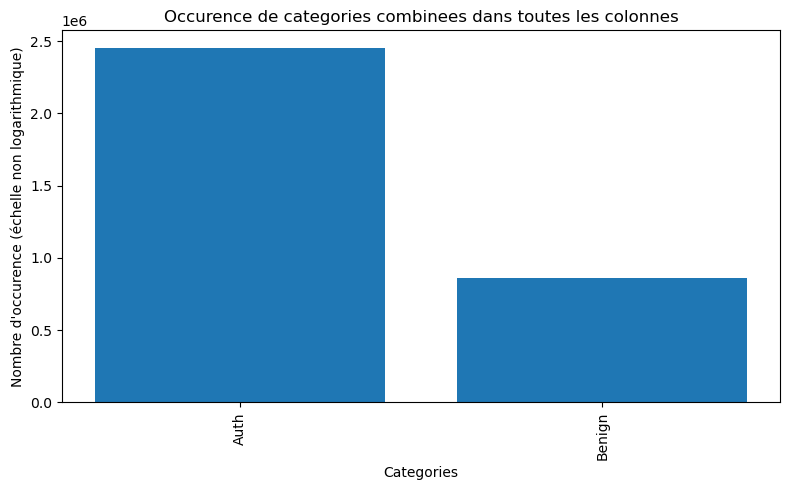

In [6]:
train_sets, test_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(train_sets) + len(test_sets))

plot_bar_chart(count_label(train_sets, file_path=file_path), 'Occurence de categories combinees dans toutes les colonnes', 'Categories', 'Nombre d\'occurence', 8, 5, log_scale=False)

## Define variables

In [4]:
performance_path = 'performance.csv'
file_path = '.\Files\\Auth\\'
model_path_binary = '.\\Auth_model\\Binary\\'
local_path = '.\\Auth_model\\'
model_path_all_classes = '.\\Auth_model\\All_classes\\'
after_build_csv = 'after_build_set_scaled.csv'

# Get path data
build_sets, after_build_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(build_sets) + len(after_build_sets))

# Get build datasets
build_nb = round(len(build_sets) * 0.8)
train_sets = build_sets[:build_nb]
# train_sets = train_sets[: round(len(train_sets) * 0.5)]
test_sets = build_sets[build_nb:]
# test_sets = test_sets[: round(len(test_sets) * 0.5)]

# Define different columns
X_columns = x_columns(read_csv_file(train_sets[0], path_to_datasets=file_path))
print(len(X_columns))
X_columns = X_columns[:-1]
y_column = 'label'
z_column = 'Binary'

14
47


## First model (Binary (Auth or Benigh))

### Building model

In [9]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    {
        "Name": "MLP",
        "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    },
]

In [9]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Buidling models
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_binary, X_columns=X_columns, y_column=z_column, encoder=encoder, scaler=scaler, confusionMatrix=False)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

 56%|█████▌    | 5/9 [19:08<15:49, 237.39s/it]  File "c:\Users\mlcra\AppData\Local\Programs\Orange\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
100%|██████████| 9/9 [2:15:42<00:00, 904.69s/it] 


['.\\Auth_model\\Binary\\encoder.joblib']

#### Complex models

In [5]:
complexModelsDitionnary = [
    {
        "Name": "Voting (Cat, XGB, RF)",
        "Model": VotingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('XGB', XGBClassifier(random_state = 42)),
            ('RF', RandomForestClassifier(random_state = 42)),
            ],
            voting='soft')
    },
    {
        "Name": "Bagging (Cat)",
        "Model": BaggingClassifier(base_estimator=CatBoostClassifier(random_state = 42, verbose = 0), n_estimators=15)
    },
    {
        "Name": "Stacking (Cat, XGB, RF)",
        "Model": StackingClassifier([
            ('XGB', XGBClassifier(random_state = 42)),
            ('RF', RandomForestClassifier(random_state = 42)),
            ],
            final_estimator=CatBoostClassifier(random_state = 42, verbose = 0),
            cv=5)
    },
]

In [6]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Buidling models
for model in complexModelsDitionnary:
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_binary + "complex_", X_columns=X_columns, y_column=z_column, encoder=encoder, scaler=scaler, confusionMatrix=False)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

100%|██████████| 2/2 [00:00<00:00, 11.11it/s]


['.\\Auth_model\\Binary\\encoder.joblib']

#### Feature Importance

.\Auth_model\Binary\model_DT.joblib
.\Auth_model\Binary\model_RF.joblib
.\Auth_model\Binary\model_ET.joblib
.\Auth_model\Binary\model_XGB.joblib
.\Auth_model\Binary\model_Cat.joblib
.\Auth_model\Binary\model_LIGHT.joblib
.\Auth_model\Binary\model_GBoost.joblib
.\Auth_model\Binary\model_Adaboost.joblib


100%|██████████| 8/8 [00:00<00:00, 67.07it/s]


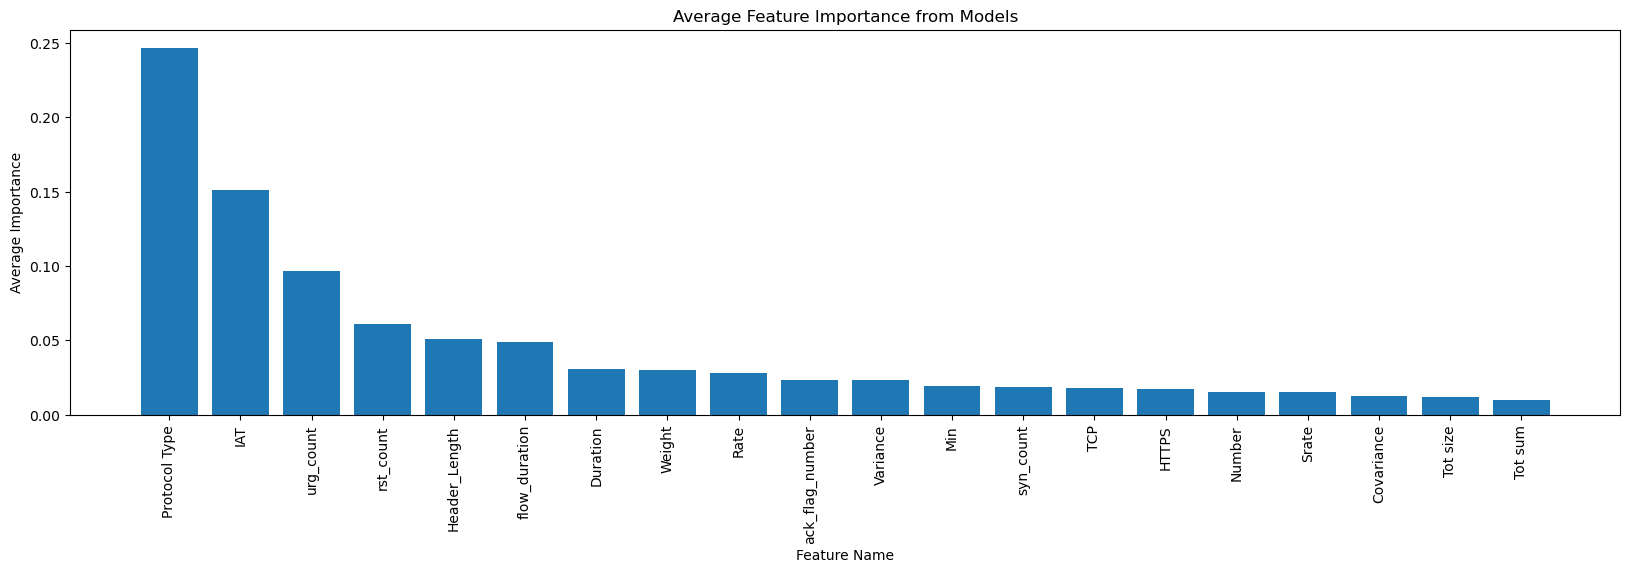

,Feature,Average Importance
2,Protocol Type,0.246372
39,IAT,0.150993
17,urg_count,0.096468
18,rst_count,0.061066
1,Header_Length,0.051020
0,flow_duration,0.049101
3,Duration,0.030767
45,Weight,0.030155
4,Rate,0.028344
11,ack_flag_number,0.023473


In [10]:
# Import encoder and get all features
encoder = get_encoder(model_path_binary, "Please, build models first")

simpleModelsDef = model_dict_refactor_with_load_model(simpleModelsDef, model_path_binary)

# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, train_sets, X_columns, z_column, X_columns, file_path, fitted_models=True, filter_bool=False, scaler=scaler, encoder=encoder)
average_importance_df.to_csv('.\\resultats\\Auth\\Binary\\feature_importance.csv', index=False)
average_importance_df.head(average_importance_df.size)

#### Display performance

In [9]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_binary)
performance = performance.drop(4).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_binary + performance_path, index=False)

In [7]:
read_csv_file(performance_path, model_path_binary).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(20)

,Model,Accuracy Training,Recall Training,Precision Training,F1 Training,Accuracy Testing,Recall Testing,Precision Testing,F1 Testing,FU_rate,FL_rate,FU,FL,Total rows
9,"Voting (Cat, XGB, RF)",0.993540,0.994797,0.988611,0.991651,0.983078,0.982873,0.973749,0.978191,0.012369,0.004553,7843,2887,634100
10,Bagging (Cat),0.989455,0.990524,0.982459,0.986400,0.982903,0.982710,0.973473,0.977968,0.012507,0.004589,7931,2910,634100
4,Cat,0.990150,0.991135,0.983602,0.987288,0.982839,0.982192,0.973746,0.977866,0.012194,0.004968,7732,3150,634100
11,"Stacking (Cat, XGB, RF)",0.994851,0.995248,0.991449,0.993329,0.982676,0.981450,0.973977,0.977633,0.011851,0.005472,7515,3470,634100
3,XGB,0.988061,0.988909,0.980505,0.984607,0.982309,0.981878,0.972761,0.977199,0.012758,0.004933,8090,3128,634100
1,RF,0.999995,0.999994,0.999992,0.999993,0.981467,0.980584,0.971847,0.976104,0.013022,0.005512,8257,3495,634100
5,LIGHT,0.983138,0.983981,0.973015,0.978323,0.981012,0.981161,0.970332,0.975574,0.014181,0.004807,8992,3048,634100
2,ET,0.999997,0.999996,0.999996,0.999996,0.978054,0.979246,0.965100,0.971874,0.017205,0.004741,10910,3006,634100
0,DT,0.999997,0.999995,0.999996,0.999996,0.974329,0.966269,0.966874,0.966571,0.012577,0.013094,7975,8303,634100
6,GBoost,0.974160,0.973539,0.960680,0.966859,0.973566,0.972694,0.959948,0.966075,0.018882,0.007552,11973,4789,634100


## Do prediction for after build sets

In [5]:
# Define model and import encoder
model = joblib.load(model_path_binary + 'model_XGB.joblib')
encoder = get_encoder(model_path_binary, "Please, build binary model(s) first")

# Get prediction
new_after_build_set, y_test, y_pred, z_test = get_prediction_by_model_s(model, after_build_sets, file_path, X_columns, y_column=z_column, z_column=y_column, scale=True, encode=True, scaler=scaler, encoder=encoder)

# Build new dataframe
new_after_build_set[z_column] = encoder.inverse_transform(y_test)
new_after_build_set['Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set[y_column] = z_test
count = len(new_after_build_set[new_after_build_set[z_column] != new_after_build_set['Prediction']])

# Save dataframe
new_after_build_set.to_csv(local_path + after_build_csv, index=False)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set) * 100,len(new_after_build_set)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows'])

del new_after_build_set

res.head()

100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


,Accuracy,Recall,Precision,F1,Mispredicted count,Mispredicted rate,Total rows
0,0.963103,0.963103,0.962985,0.962626,11161,3.689697,302491


## Second model (All Recon classes)

### Building model

In [10]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    {
        "Name": "MLP",
        "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    },
]

In [11]:
filter_name = [
    {'name': 'Auth', 'type': '='},
]
filter_cols = ['Binary']

In [7]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_all_classes)
performance = get_or_define_performance_df(model_path_all_classes, performance_path)

# Buidling models
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_all_classes, X_columns=X_columns , y_column=y_column, filter_cols=filter_cols, filter_bool=True, filter_name=filter_name, scaler=scaler, encoder=encoder)

    # Save performance
    performance.to_csv(model_path_all_classes + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_all_classes+'encoder.joblib')

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [1:23:04<00:00, 1661.62s/it]


['.\\Auth_model\\All_classes\\encoder.joblib']

#### Complex models

In [12]:
complexModelsDitionnary = [
    {
        "Name": "Voting (Cat, XGB, LIGHT)",
        "Model": VotingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('XGB', XGBClassifier(random_state = 42)),
            ('LIGHT', LGBMClassifier(random_state = 42, verbose = 0)),
            ],
            voting='soft')
    },
    {
        "Name": "Bagging (XGB)",
        "Model": BaggingClassifier(base_estimator=XGBClassifier(random_state = 42), n_estimators=15)
    },
    {
        "Name": "Stacking (Cat, LIGHT, XGB)",
        "Model": StackingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('LIGHT', LGBMClassifier(random_state = 42, verbose = 0)),
            ],
            final_estimator=XGBClassifier(random_state = 42),
            cv=5)
    },
]

In [13]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_all_classes)
performance = get_or_define_performance_df(model_path_all_classes, performance_path)

# Buidling models
for model in tqdm(complexModelsDitionnary):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_all_classes + "complex_", X_columns=X_columns , y_column=y_column, filter_cols=filter_cols, filter_bool=True, filter_name=filter_name, scaler=scaler, encoder=encoder)

    # Save performance
    performance.to_csv(model_path_all_classes + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_all_classes+'encoder.joblib')

  0%|          | 0/3 [00:00<?, ?it/s]  File "c:\Users\mlcra\AppData\Local\Programs\Orange\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
100%|██████████| 3/3 [1:55:58<00:00, 2319.59s/it]


['.\\Auth_model\\All_classes\\encoder.joblib']

#### Feature Importance

.\Auth_model\All_classes\model_DT.joblib
.\Auth_model\All_classes\model_RF.joblib
.\Auth_model\All_classes\model_ET.joblib
.\Auth_model\All_classes\model_XGB.joblib
.\Auth_model\All_classes\model_Cat.joblib
.\Auth_model\All_classes\model_LIGHT.joblib
.\Auth_model\All_classes\model_GBoost.joblib
.\Auth_model\All_classes\model_Adaboost.joblib


100%|██████████| 8/8 [00:00<00:00, 91.28it/s]


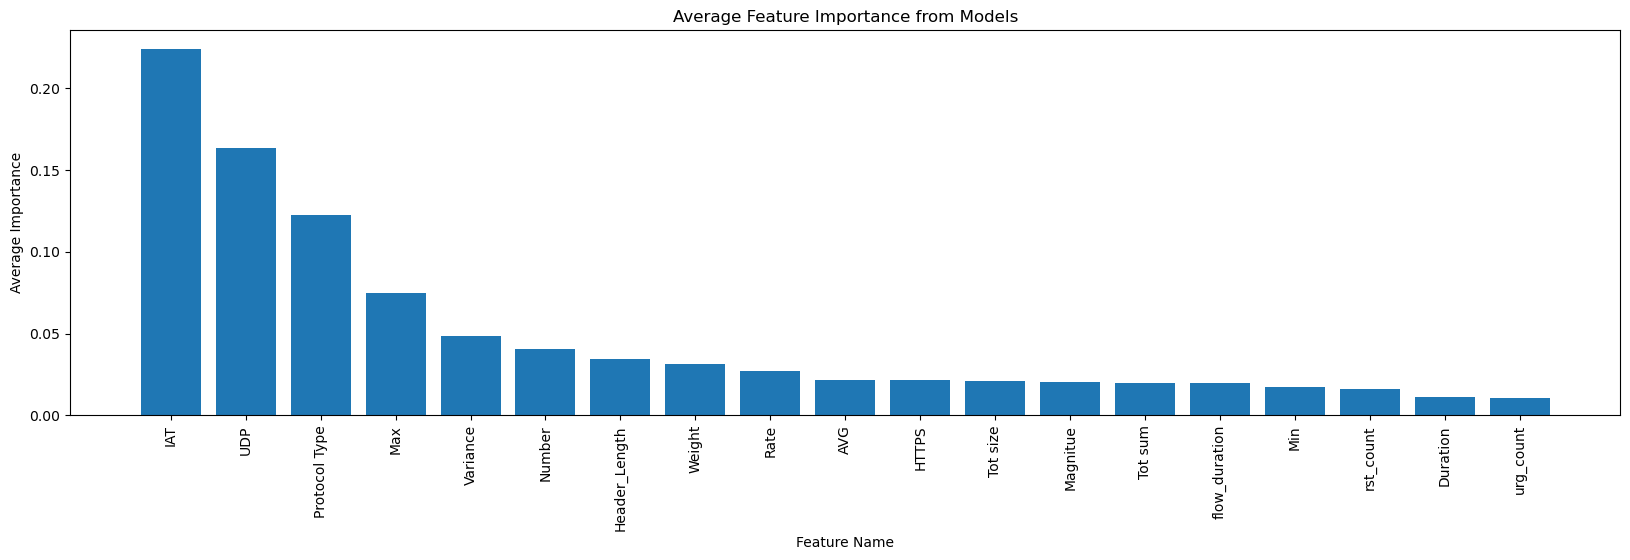

,Feature,Average Importance
39,IAT,0.224448
27,UDP,0.163792
2,Protocol Type,0.122257
35,Max,0.074666
44,Variance,0.048739
40,Number,0.040672
1,Header_Length,0.034544
45,Weight,0.031264
4,Rate,0.026796
36,AVG,0.021721


In [11]:
# Import encoder and get all features
encoder = get_encoder(model_path_all_classes, "Please, build models first")

simpleModelsDef = model_dict_refactor_with_load_model(simpleModelsDef, model_path_all_classes)

# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, train_sets, X_columns, z_column, X_columns, file_path, fitted_models=True, filter_bool=False, scaler=scaler, encoder=encoder)
average_importance_df.to_csv('.\\resultats\\Auth\\All_classes\\feature_importance.csv', index=False)
average_importance_df.head(average_importance_df.size)

### Display performance

In [15]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_all_classes)
performance = performance.drop(4).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_all_classes + performance_path, index=False)

In [14]:
read_csv_file(performance_path, model_path_all_classes).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(20)

,Model,Accuracy Training,Recall Training,Precision Training,F1 Training,Accuracy Testing,Recall Testing,Precision Testing,F1 Testing,FU_rate,FL_rate,FU,FL,Total rows
9,"Voting (Cat, XGB, LIGHT)",0.993822,0.971818,0.985805,0.978507,0.986059,0.907644,0.958918,0.927948,0.007745,0.006196,3637,2910,469621
10,Bagging (XGB),0.994257,0.968562,0.987333,0.977387,0.985965,0.904644,0.966577,0.928009,0.007926,0.006109,3722,2869,469621
3,XGB,0.995024,0.976153,0.988864,0.982258,0.985725,0.907689,0.958916,0.928047,0.008021,0.006254,3767,2937,469621
5,LIGHT,0.969947,0.951957,0.870641,0.894822,0.985501,0.908180,0.940614,0.922097,0.007738,0.006761,3634,3175,469621
4,Cat,0.992263,0.950503,0.982324,0.964675,0.985295,0.904258,0.957101,0.925001,0.008232,0.006473,3866,3040,469621
1,RF,0.999998,0.999978,0.999996,0.999987,0.984886,0.891912,0.965471,0.917616,0.008752,0.006363,4110,2988,469621
11,"Stacking (Cat, LIGHT, XGB)",0.977392,0.934748,0.965938,0.948507,0.984162,0.901592,0.951756,0.921664,0.009418,0.006420,4423,3015,469621
6,GBoost,0.983537,0.904020,0.961478,0.926797,0.982426,0.890727,0.957032,0.915455,0.011062,0.006512,5195,3058,469621
0,DT,0.999999,0.999998,0.999997,0.999998,0.980806,0.901106,0.895413,0.898163,0.009731,0.009463,4570,4444,469621
2,ET,0.999999,0.999999,0.999999,0.999999,0.980220,0.860262,0.953465,0.886546,0.012314,0.007466,5783,3506,469621


## Final Prediction

In [11]:
# Define model and import encoder
model = joblib.load(model_path_all_classes + 'model_XGB.joblib')
encoder = get_encoder(model_path_all_classes, "Please, build binary model(s) first")

# Get binary col to include it into the new df
pred_column = 'Prediction'
binary_col = get_col_in_csv(after_build_csv, model_repo, z_column, pred_column, filter_name, filter=True, verbose=True)

# Get prediction
new_after_build_set, y_test, y_pred, z_test = get_prediction_by_model_s(model, [after_build_csv], model_repo, X_columns, y_column=y_column, z_column=pred_column, filter_bool=True, filter_name=filter_name, scale=True, encode=False, scaler=scaler, encoder=encoder)

# Build new dataframe and save it
new_after_build_set[y_column] = y_test
new_after_build_set['Final Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set[z_column] = binary_col
new_after_build_set['Prediction'] = z_test
count = len(new_after_build_set[new_after_build_set[y_column] != new_after_build_set['Final Prediction']])
y_pred = encoder.inverse_transform(y_pred)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set),len(new_after_build_set)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows']).head()

res.head()

Dataframe length: 302491.
After reduction dataframe length: 68920.


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


,Accuracy,Recall,Precision,F1,Mispredicted count,Mispredicted rate,Total rows
0,0.88372,0.88372,0.847486,0.864784,8014,0.11628,68920


In [12]:
labelBenignTraffic = new_after_build_set[
    (new_after_build_set['label'] == 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] != 'BenignTraffic')
]
FinalBenighTraffic = new_after_build_set[
    (new_after_build_set['label'] != 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] == 'BenignTraffic')
]
GoodBenignTraffic = new_after_build_set[
    (new_after_build_set['label'] == 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] == 'BenignTraffic')
]

del new_after_build_set

In [13]:
print(len(labelBenignTraffic), len(FinalBenighTraffic), len(GoodBenignTraffic))

2896 0 0
